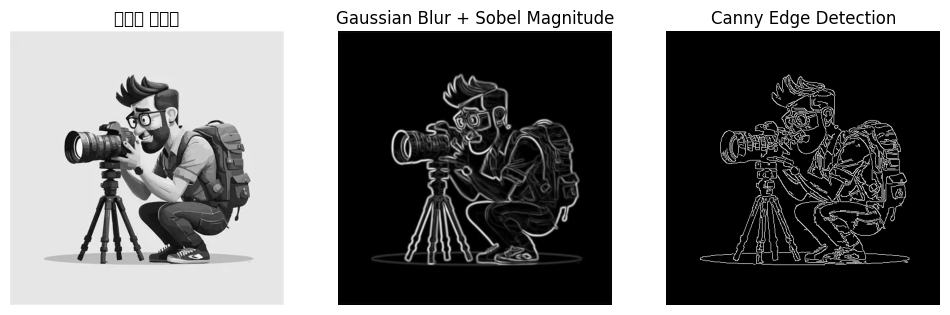

<Figure size 640x480 with 0 Axes>

In [3]:
# ===============================
# Canny Edge Detection - বাংলা উদাহরণ
# ===============================

import cv2
import numpy as np
import matplotlib.pyplot as plt

# ১️⃣ ছবি লোড করা
img = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)  # গ্রেস্কেল ছবি লোড
if img is None:
    print("ছবি খুঁজে পাওয়া যায়নি।")
    exit()

# ২️⃣ Gaussian Blur - শব্দ কমানো
blur = cv2.GaussianBlur(img, (5, 5), 1.4)

# ৩️⃣ Sobel ফিল্টার দিয়ে গ্রেডিয়েন্ট হিসাব করা
Gx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)  # X দিক
Gy = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)  # Y দিক

magnitude = np.sqrt(Gx**2 + Gy**2)  # edge শক্তি
angle = np.arctan2(Gy, Gx) * (180 / np.pi)  # edge দিক (degree)

# ৪️⃣ Non-Maximum Suppression - edge পাতলা করা
# OpenCV Canny এ স্বয়ংক্রিয়ভাবে করা হয়, তাই এখানে শুধুমাত্র Canny ব্যবহার করা সহজ
low_threshold = 50
high_threshold = 150

edges = cv2.Canny(img, low_threshold, high_threshold)

# ৫️⃣ ফলাফল দেখানো
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title('মূল ছবি')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Gaussian Blur + Sobel Magnitude')
plt.imshow(magnitude, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Canny Edge Detection')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()

# ৬️⃣ চূড়ান্ত এজ সংরক্ষণ (optional)
cv2.imwrite('canny_edges.png', edges)


plt.savefig("fig.png")
